# Project 1

### Jackson Thetford

## Part 1

In [40]:
import sklearn 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
auto = pd.read_csv('project1.data')

In [3]:
print(f'Shape of the dataset: {auto.shape}') # Shape: 398 rows, 9 columns

Shape of the dataset: (398, 9)


In [4]:
auto.head() # 3582 total entries

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### `auto.info()` gives us info on the number of entries in each column and that we have the following data types: 

#### `float64`(3), `int64`(4), `object`(2)


#### Furthemore, it tell us we have 6 null valus in horsepower.

#### Lastly, it tells us that the 'horsepower' column is of type 'object' but should be of type integer.

In [6]:
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


In [7]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce') # coerce preserves NaN values

In [8]:
auto['horsepower'].isnull().sum() # we have 6 null values in horsepower column

6

#### We will drop the "car_name" column. I have looked ahead at the rest of the project and as there are 305 unique car names, this variable will not help us with our linear regression to predict fuel efficiency.

In [9]:
len(auto['car_name'].unique()) # 305 unique values for car_name, so we're not gonna one hot encode this

305

In [10]:
auto.drop('car_name', axis=1, inplace=True)

In [11]:
auto.describe() # gives us statistical data (probably gonna fill the missing values with the mean)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
auto.duplicated().sum() # there are no duplicate rows

0

In [13]:
auto.isnull().sum() # only horsepower contains null values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

#### After consideration, I have decided to fill the 6 missing values from the horsepower column with the statistical mean.

In [14]:
auto['horsepower'].fillna(auto['horsepower'].mean(), inplace=True) 

/var/folders/hm/klr8rtx572v84mlfrf6m6vp80000gn/T/ipykernel_55010/3907365199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto['horsepower'].fillna(auto['horsepower'].mean(), inplace=True)


In [15]:
auto.isnull().sum() # No more missing values!

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [16]:
# Now, looking at statistical data:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### It looks that their may be an outlier of '230' in horse power, as it is over 3 standard deviations away 
#### from the mean, same with the '46.6' value in the mpg column. Will confirm with visualization later.

#### One hot encoding...

In [17]:
auto['origin'].unique() # We can see that the origin catagory only has 3 unique values. We can one hot encode this

array([1, 3, 2])

In [18]:
auto['origin'] = auto['origin'].astype('category')

In [19]:
auto = pd.get_dummies(auto, columns=['origin'], drop_first=True)

#### We now have one hot encoded the origin with "origin_2" and "origin_3" column bools

In [20]:
auto.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin_2      398 non-null    bool   
 8   origin_3      398 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 22.7 KB


#### There seems to be a correlation between year and mpg ...

In [21]:
auto.groupby(['model_year'])['mpg'].mean() 

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

## Visualizing the dataset

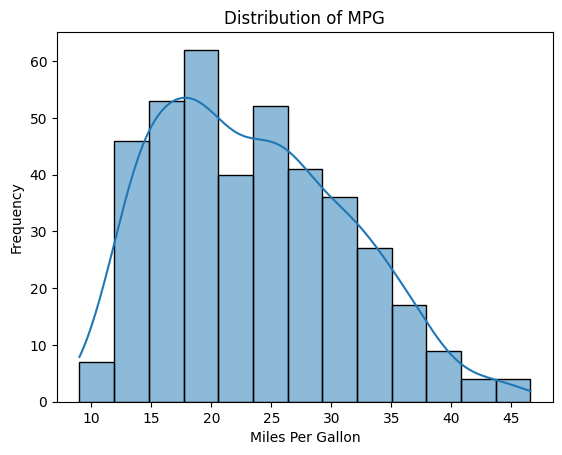

In [22]:
sns.histplot(data=auto, x='mpg', kde=True)
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.show()

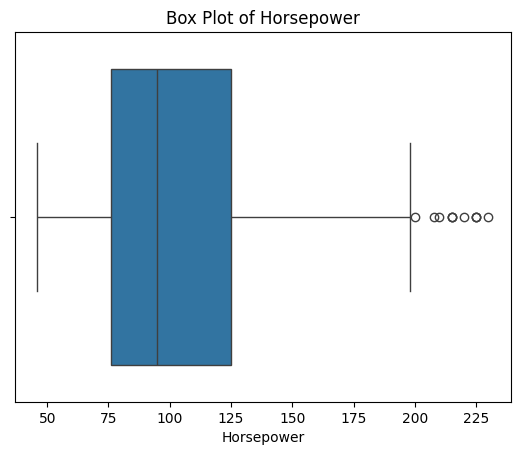

In [23]:
sns.boxplot(x=auto['horsepower'])
plt.title('Box Plot of Horsepower')
plt.xlabel('Horsepower')
plt.show() # Note we can see some outliers as previously suspected

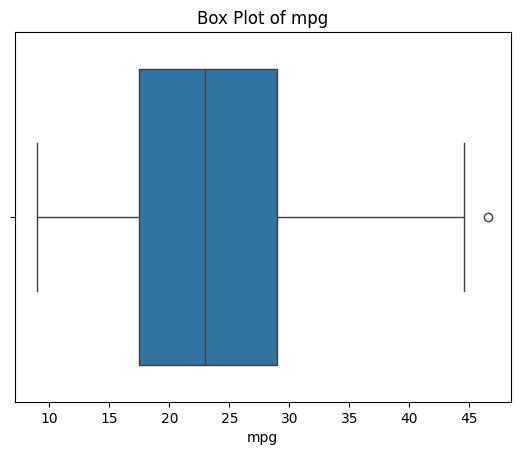

In [24]:
sns.boxplot(x=auto['mpg'])
plt.title('Box Plot of mpg')
plt.xlabel('mpg')
plt.show() # Note we can see one outliers as previously suspected

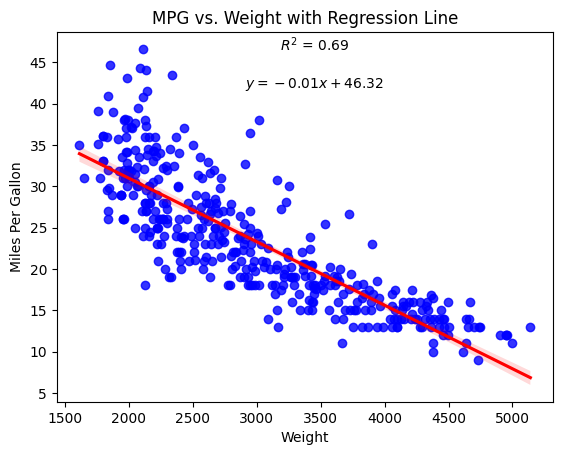

In [25]:
from scipy import stats
x = auto['weight']
y = auto['mpg']

# Finding regression line equation
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plotting
sns.regplot(x='weight', y='mpg', data=auto, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('MPG vs. Weight with Regression Line')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')

# Annotate with the R^2 value
plt.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.45, 0.95), xycoords='axes fraction') # I used chatGPT to help me plot this
equation = f'$y = {slope:.2f}x + {intercept:.2f}$'
plt.annotate(equation, xy=(0.38, 0.85), xycoords='axes fraction')

plt.show() # We can see a clear, fairly strong negative correlation between the mpg and weight of the car

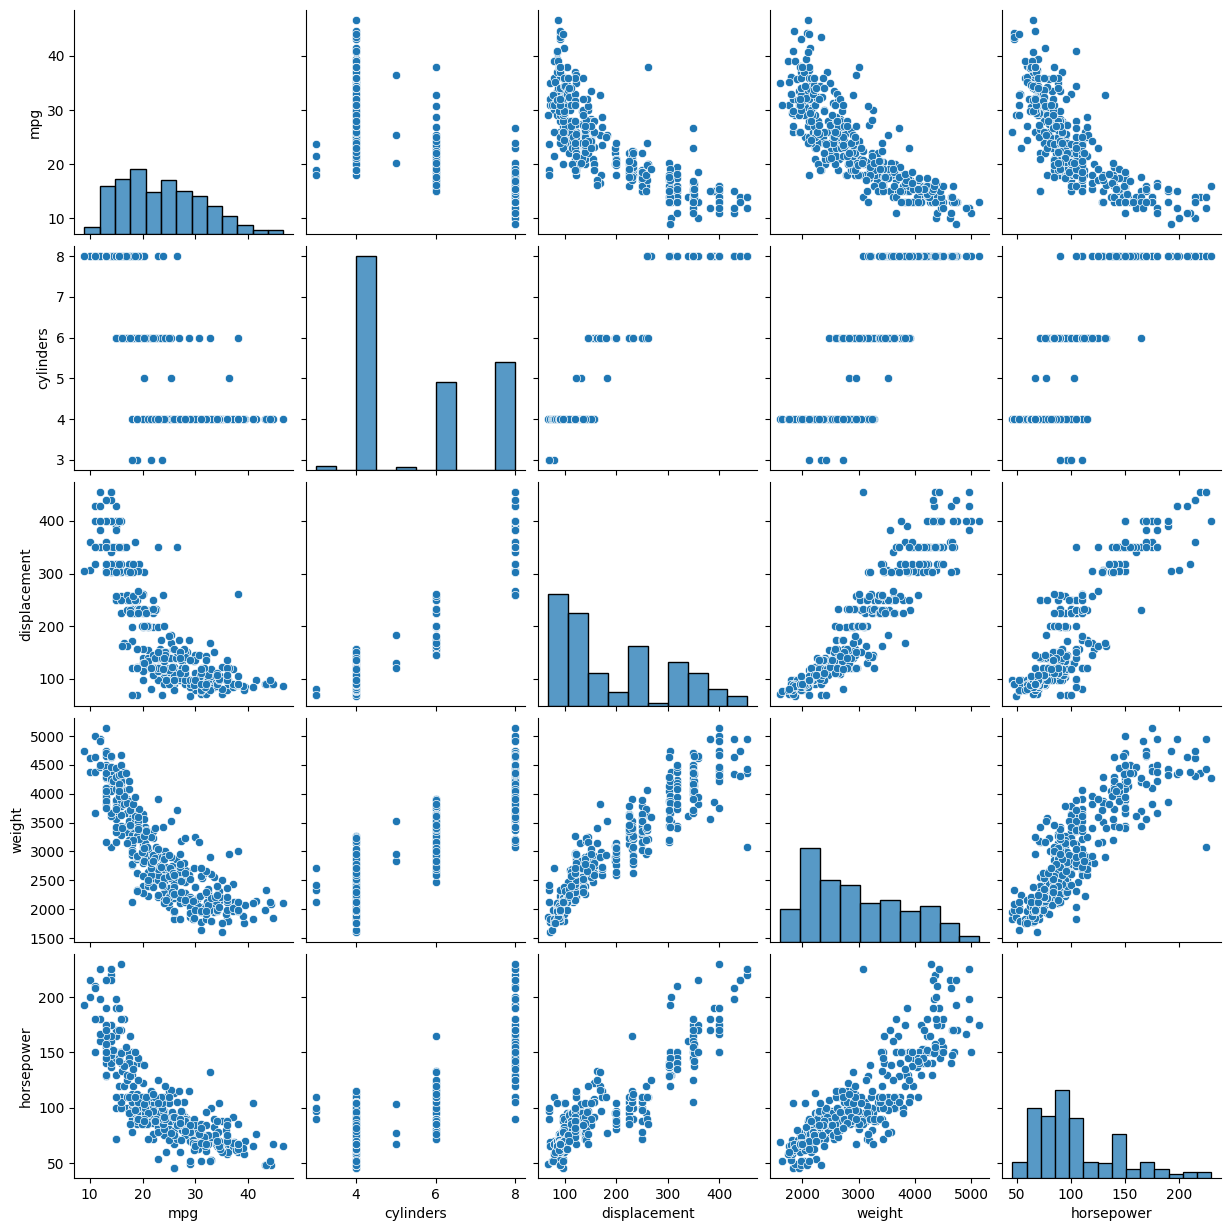

In [26]:
sns.pairplot(auto[['mpg', 'cylinders', 'displacement', 'weight', 'horsepower']])
plt.show() # Shows us many plots to help us visualize all correlations

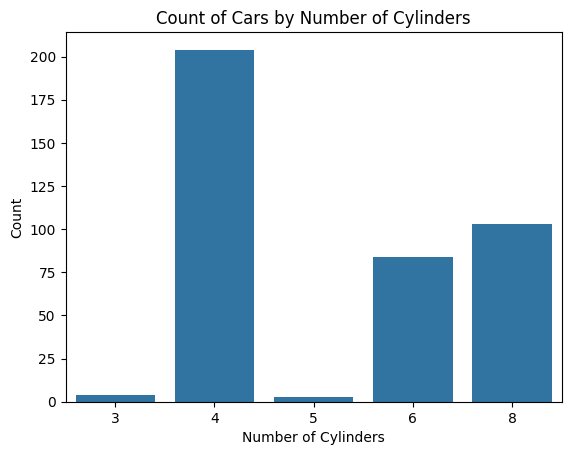

In [27]:
sns.countplot(data=auto, x='cylinders')
plt.title('Count of Cars by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()

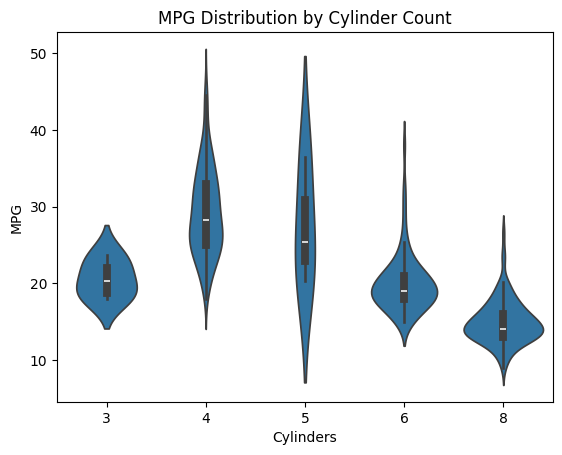

In [28]:
sns.violinplot(data=auto, x='cylinders', y='mpg')
plt.title('MPG Distribution by Cylinder Count')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

#### More regression plots related to mpg...

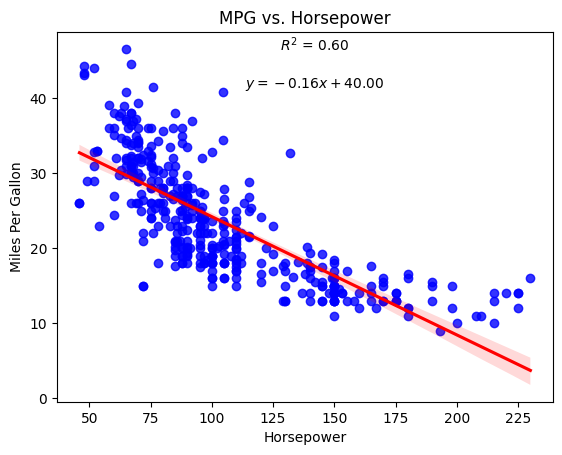

In [29]:
x = auto['horsepower']
y = auto['mpg']

# Finding regression line equation
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plotting
sns.regplot(x='horsepower', y='mpg', data=auto, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('MPG vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')

# Annotate with the R^2 value
plt.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.45, 0.95), xycoords='axes fraction') # I used chatGPT to help me plot this
equation = f'$y = {slope:.2f}x + {intercept:.2f}$'
plt.annotate(equation, xy=(0.38, 0.85), xycoords='axes fraction')

plt.show() # We can see a clear, fairly strong negative correlation between the mpg and horsepower of the car

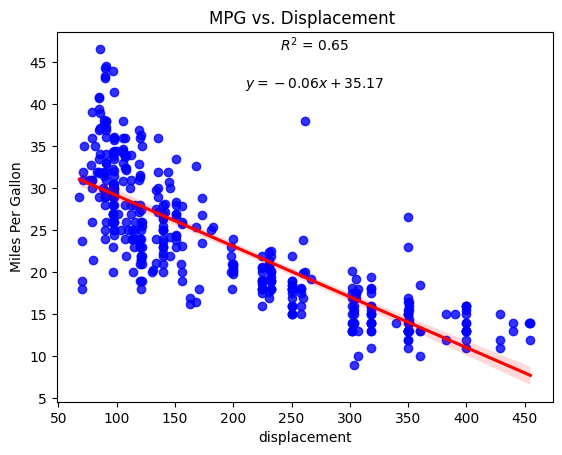

In [30]:
x = auto['displacement']
y = auto['mpg']

# Finding regression line equation
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plotting
sns.regplot(x='displacement', y='mpg', data=auto, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('MPG vs. Displacement ')
plt.xlabel('displacement')
plt.ylabel('Miles Per Gallon')

# Annotate with the R^2 value
plt.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.45, 0.95), xycoords='axes fraction') # I used chatGPT to help me plot this
equation = f'$y = {slope:.2f}x + {intercept:.2f}$'
plt.annotate(equation, xy=(0.38, 0.85), xycoords='axes fraction')

plt.show() # We can see a clear, fairly strong negative correlation between the mpg and displacement of the car

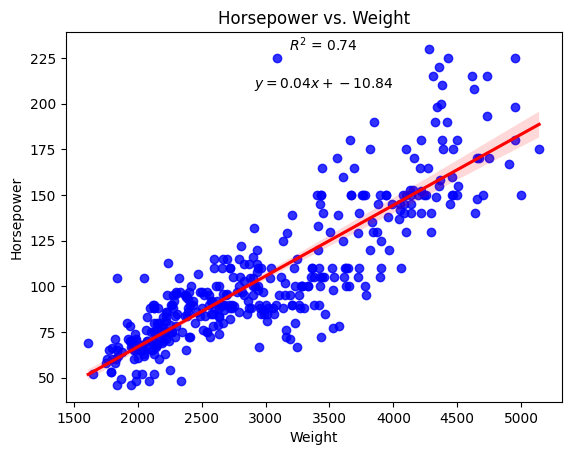

In [31]:
x = auto['weight']
y = auto['horsepower']

# Finding regression line equation
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plotting
sns.regplot(x='weight', y='horsepower', data=auto, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Horsepower vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Horsepower')

# Annotate with the R^2 value
plt.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.45, 0.95), xycoords='axes fraction') # I used chatGPT to help me plot this
equation = f'$y = {slope:.2f}x + {intercept:.2f}$'
plt.annotate(equation, xy=(0.38, 0.85), xycoords='axes fraction')

plt.show() # We can see a clear, fairly strong positive correlation between the horsepower and weight of the car

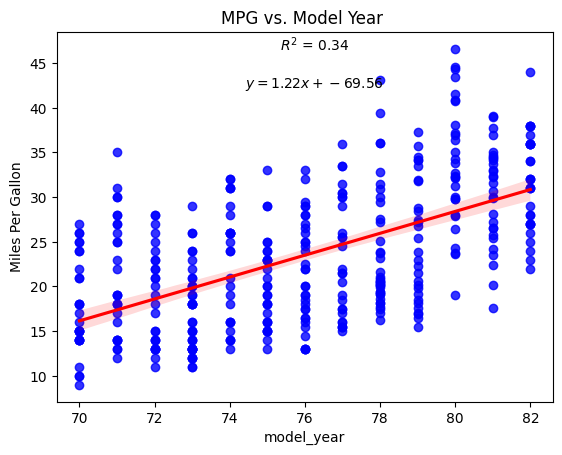

In [32]:
x = auto['model_year']
y = auto['mpg']

# Finding regression line equation
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plotting
sns.regplot(x='model_year', y='mpg', data=auto, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('MPG vs. Model Year ')
plt.xlabel('model_year')
plt.ylabel('Miles Per Gallon')

# Annotate with the R^2 value
plt.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.45, 0.95), xycoords='axes fraction') # I used chatGPT to help me plot this
equation = f'$y = {slope:.2f}x + {intercept:.2f}$'
plt.annotate(equation, xy=(0.38, 0.85), xycoords='axes fraction')

plt.show() # We can see a clear, fairly strong negative correlation between the mpg and displacement of the car

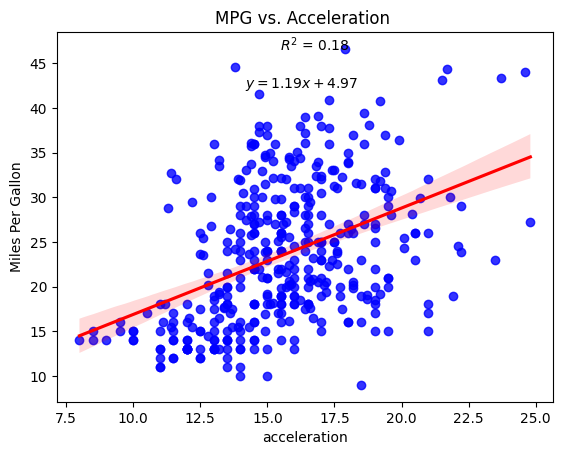

In [33]:
x = auto['acceleration']
y = auto['mpg']

# Finding regression line equation
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plotting
sns.regplot(x='acceleration', y='mpg', data=auto, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('MPG vs. Acceleration ')
plt.xlabel('acceleration')
plt.ylabel('Miles Per Gallon')

# Annotate with the R^2 value
plt.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.45, 0.95), xycoords='axes fraction') # I used chatGPT to help me plot this
equation = f'$y = {slope:.2f}x + {intercept:.2f}$'
plt.annotate(equation, xy=(0.38, 0.85), xycoords='axes fraction')

plt.show() # We can see a clear, fairly strong negative correlation between the mpg and displacement of the car

### Insights on what variables affect the fuel efficiency of automobiles
From the graphs, we can determine the variables that have the greatest affect on the fuel efficiency (mpg) of the cars in the data set.
We can clearly see that horsepower, weight, and displacement have the largest affect on the mpg of a car, all with a negative relationship and a fairly high correlation as seen by the graphs and the high $R^2$ values. The year of the car also has a notable affect on the mpg, as newer cars generally have a higher fuel efficiency, however this correlation is not as strong as the other variables. Acceleration also has some evidence to have a relationship with the mpg, as a car with a higher acceleration also shows a higher mpg, however, the correlation between acceleration and mpg is weaker than all the other variables. 

#### Commentary
The variables that have high correlations with the fuel efficiency of the car all make intuitive sense:
- **Horsepower**: is a synonym for 'power' and a car with high horsepower is a car with lots of power. This power requires more fuel, hence the low fuel efficiency with cars with high horsepower, and high fuel effeciency for cars with lower horsepower.
  
- **Weight**: A car that is heavy requires more force to move it. This force is made using more fuel than what would be used for a lighter car. As seen by the graphs, a heavy car requires lots of fuel and therefore a low fuel efficiency.
  
- **Displacement**: Engine displacement is the total volume of air/fuel mixture the pistons of an engine can draw in during one complete engine cycle. More volume translates to more fuel, therefore engines with a high displacement also require lots of fuel and have a low fuel efficiency.
  
- **Year**: Newer cars, more specifically newer engine technology, generally have better fuel efficiency. This is proven in the graphs, however in the small range of dates give (1970 - 1982), the engine technology related to fuel efficiency had lots of variability in all of the years given to us. Maybe some cars the newer years were still being built with older engines? Overall, the relationship is shown by the evident, yet small, positive correlation between the year and fuel efficiency of a car. The weakness in this correlation is most likely due to the large spread of the data points. 
  
- **Acceleration**: There is very weak correlation between fuel efficiency and acceleration of a car. This makes sense because acceleration is affected by many factors such as weight, horsepower, and the year of a car, and doesn't necessarily have a direct affect of fuel efficiency as both high and low efficiency cars can have high accelerations. That being said, there is somewhat of a positive relationship between a car's acceleration and mpg. 


## Part 2

In [34]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [35]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin_2      398 non-null    bool   
 8   origin_3      398 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 22.7 KB


### Splitting up data into training and testing sets

In [36]:
from sklearn.model_selection import train_test_split

X = auto.drop('mpg', axis=1)  # Features
y = auto['mpg']  # Target variable



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Fitting Linear regression model on training data

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Printing Equation
model_equation = ""
for i in range(model.n_features_in_):
    print(f'Feature: {model.feature_names_in_[i]}, Coefficient: {model.coef_[i]:.3f}')
    model_equation += f'({model.coef_[i]:.3f})*{model.feature_names_in_[i]}'
    if i < model.n_features_in_ - 1:
        model_equation += ' + '

model_equation = 'mpg = ' + model_equation + " " + str(model.intercept_)
print(f'\nEquation: \n{model_equation}')

Feature: cylinders, Coefficient: -0.396
Feature: displacement, Coefficient: 0.029
Feature: horsepower, Coefficient: -0.021
Feature: weight, Coefficient: -0.007
Feature: acceleration, Coefficient: 0.066
Feature: model_year, Coefficient: 0.838
Feature: origin_2, Coefficient: 2.991
Feature: origin_3, Coefficient: 2.378

Equation: 
mpg = (-0.396)*cylinders + (0.029)*displacement + (-0.021)*horsepower + (-0.007)*weight + (0.066)*acceleration + (0.838)*model_year + (2.991)*origin_2 + (2.378)*origin_3 -21.379795484727328


In [39]:
from sklearn.metrics import r2_score

# predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Using r^2 as a measure of accuracy. 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Training R^2 score: {r2_train}")
print(f"Test R^2 score: {r2_test}")

Training R^2 score: 0.8140809771344937
Test R^2 score: 0.8431594053433744


#### We can't plot the linear regression in 2D. Model has many independant variables.

### Which of the above measures is more relevant for this problem statement?

For our case, the test accuracy (the $R^2$ value) is  more relevant and indicative of our model's performance. This is because the test data set is data the model hasn't seen before, and a high R² score on the test set tells us that the model can preform well, beyond just the training data which would be expected. While the training $R^2$ score tells us how well the model fits the training data, an overfit model could perform well on a training set but poorly on a testing set. The testing data represents how our model will preform on the real world data that we could give it related to the fuel efficiency of cars. 

In conclusion, the test accuracy is much more relevant to our problem statment as it gives us a better sense on how our model will preform in real world scenarios. 